In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mne
!pip install numpy matplotlib pywavelets mne
!pip install numpy mne matplotlib scipy
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.1 MB/s eta 0:00:00


In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pywt
from pywt import wavedec
import os
import pyedflib

In [4]:
file = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/preprocessed/pre_SN001.edf"
raw = mne.io.read_raw_edf(file, preload=True)

Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/preprocessed/pre_SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564999  =      0.000 ... 25649.990 secs...


In [10]:
ecg = raw.get_data()[7]

### R-peak detection

In [5]:
pip install py-ecg-detectors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=2121726ee12c593f6b3ba94d9746c5e9b7b05ca3e4ee6be7894d9b726def1ca3
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy


In [6]:
from ecgdetectors import Detectors
BASIC_SRATE = 500 #Hz
detectors = Detectors(BASIC_SRATE)

In [11]:
signal_pad_samples = 10  # signal_pad 배열에 추가할 패딩 샘플의 수. 초 단위로 정의되며, 심박을 초기에 정확하게 감지하기 위해 초기 패딩 필요
signal_pad = np.zeros(signal_pad_samples) # pad one sec to detect initial peaks properly
signalf = ecg
detectors = Detectors(BASIC_SRATE)

detectors = {
            'pan_tompkins_detector':[detectors.pan_tompkins_detector, []],
            'hamilton_detector':[detectors.hamilton_detector, []],
            'christov_detector':[detectors.christov_detector, []],
            'engzee_detector':[detectors.engzee_detector, []],
            'swt_detector':[detectors.swt_detector, []],
            'two_average_detector':[detectors.two_average_detector, []],
            }

In [ ]:
# 모든 detector  *코드 실행 오래 걸림
for kd in detectors.keys():
    vd = detectors[kd]
    r_peaks = np.array(vd[0](np.hstack((signal_pad,ecg)))) - signal_pad_samples
    vd[1] = r_peaks
    plt.figure(figsize=(40,6))
    plt.title(kd)
    plt.plot(ecg,color='tab:blue',linewidth=0.8)
    plt.hlines(0,0,5000,color='black', linewidth=0.4)
    plt.xticks(r_peaks)
    plt.grid(axis='x')
    plt.show()

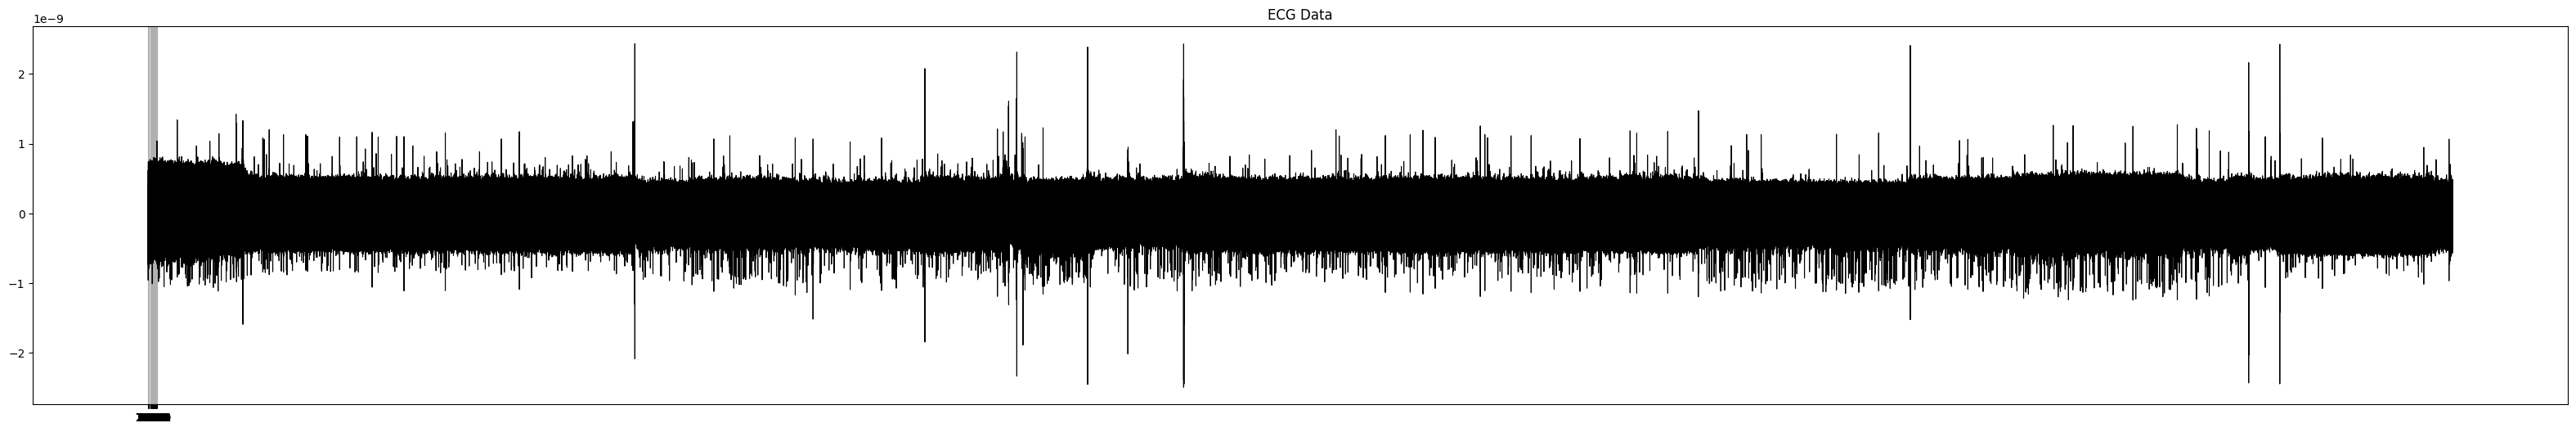

In [18]:
# christov_detector
data_signal = ecg
data_peaks = detectors['christov_detector'][1]

plt.figure(figsize=(40,6))
plt.title('ECG Data')
plt.plot(data_signal,color='black',linewidth=0.8)
plt.hlines(0,0,5000,color='black', linewidth=0.4)
plt.xticks(data_peaks)
plt.grid(axis='x')
plt.show()

일정 시간만 잘라서 보기

In [37]:
sfreq = raw.info['sfreq']  # 샘플링 주파수

# 시간 축 설정
times = np.arange(ecg.size) / sfreq

# 9420 N2, 9450 R, 9480 N1, 9510 W
# 임의의 10초 구간 선택 (예: 100초부터 110초까지)
start_sec = 9420
end_sec = 9520
start_index = int(start_sec * sfreq)
end_index = int(end_sec * sfreq)

# 선택된 구간 데이터
selected_ecg = ecg[start_index:end_index]
selected_times = times[start_index:end_index]

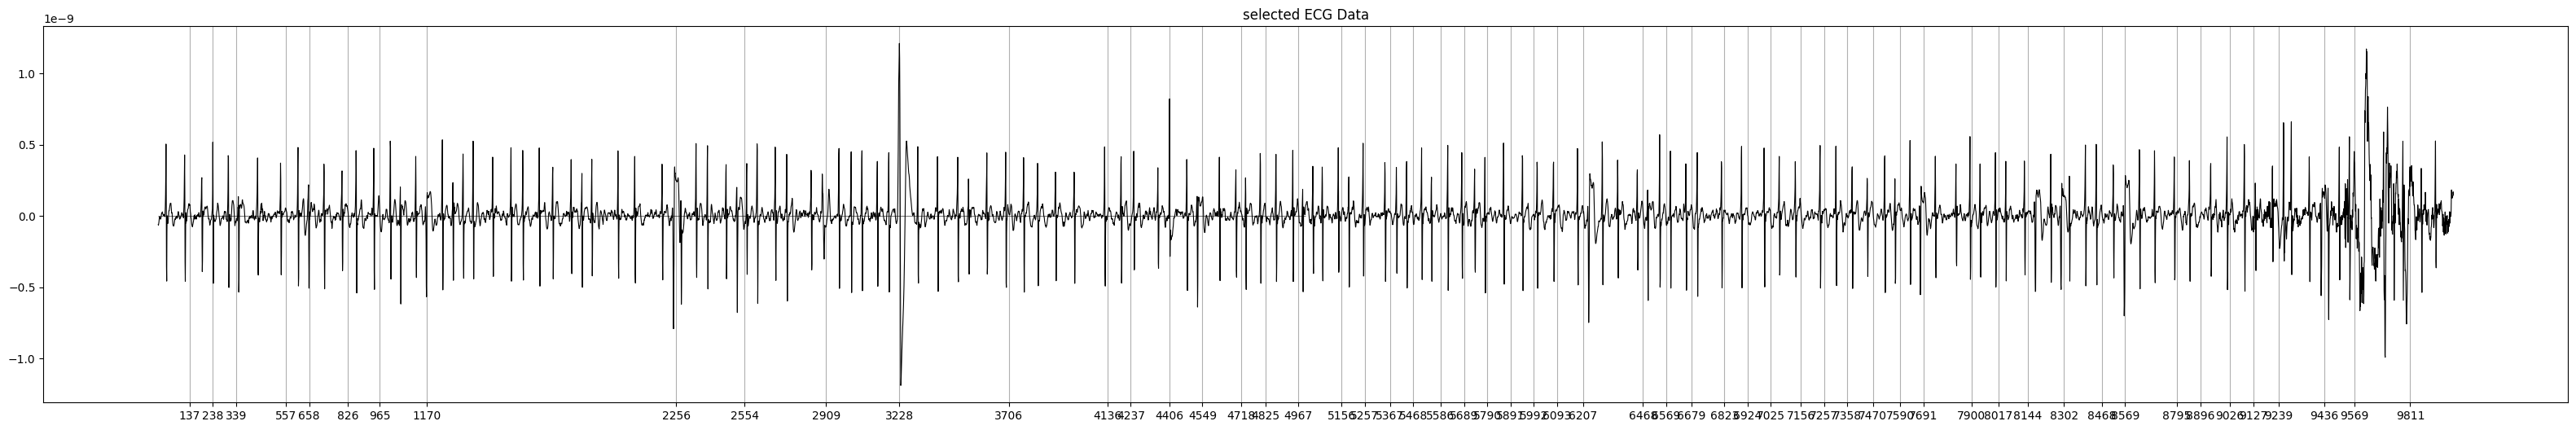

In [39]:
data_signal = selected_ecg
data_peaks = detectors['christov_detector'][1]

plt.figure(figsize=(40,6))
plt.title('selected ECG Data')
plt.plot(data_signal,color='black',linewidth=0.8)
plt.hlines(0,0,5000,color='black', linewidth=0.4)
plt.xticks(data_peaks)
plt.grid(axis='x')
plt.show()

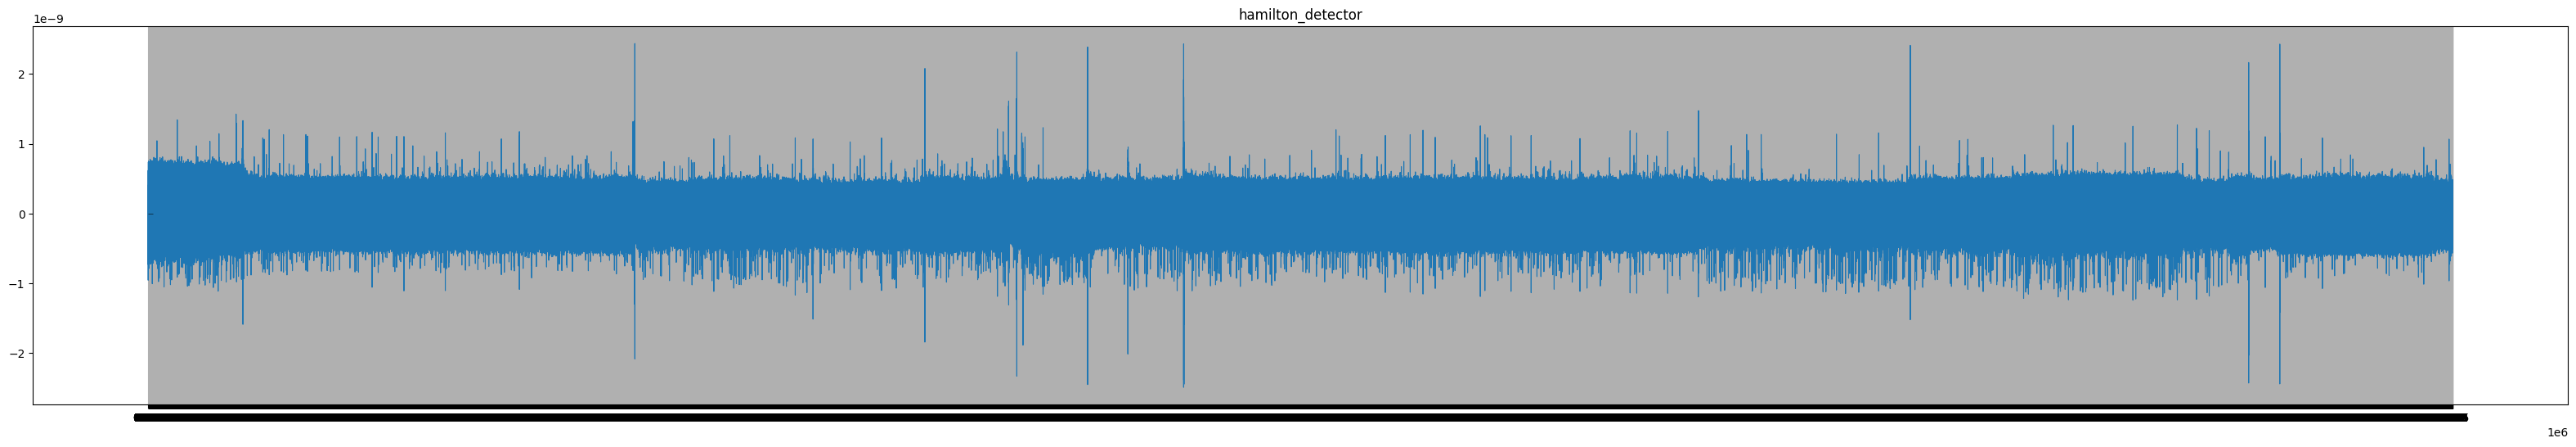

In [42]:
# 반복문에서 christov_dector만 따온 코드 -> 얘는 왜 다르지
vd = detectors['christov_detector']
r_peaks = np.array(vd[0](np.hstack((signal_pad,ecg)))) - signal_pad_samples
vd[1] = r_peaks

plt.figure(figsize=(40,6))
plt.title(kd)
plt.plot(ecg,color='tab:blue',linewidth=0.8)
plt.hlines(0,0,5000,color='black', linewidth=0.4)
plt.xticks(r_peaks)
plt.grid(axis='x')
plt.show()